In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [8]:
num_points = 400

imax = num_points
jmax = num_points
kmax = 100
dt = 0.01

dr = 1./num_points

Let us create an interesting flow-field. It wil be similar to our experiment...

In [9]:
rot_speed1 = .01*dt
rot_speed2 = .01*dt
vortex1 = [imax/2, jmax/4]
vortex2 = [imax/2, 3*jmax/4]

In [10]:
v = np.zeros((imax, jmax), dtype=np.double) # right/left
u = np.zeros((imax, jmax), dtype=np.double) # down/up

In [11]:
xgrid = np.arange(0, imax)
ygrid = np.arange(0, jmax)

xmesh, ymesh = np.meshgrid(xgrid, ygrid)

In [12]:
v_field1 = -rot_speed1*(ymesh - vortex1[0])
u_field1 = rot_speed1*(xmesh - vortex1[1])

v_field2 = -rot_speed1*(ymesh - vortex2[0])
u_field2 = rot_speed1*(xmesh - vortex2[1])

v[:, 0:jmax/2] = v_field1[:, 0:jmax/2]
v[:, jmax/2:] = v_field2[:, jmax/2:]

u[:, 0:jmax/2] = u_field1[:, 0:jmax/2]
u[:, jmax/2:] = u_field2[:, jmax/2:]

/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


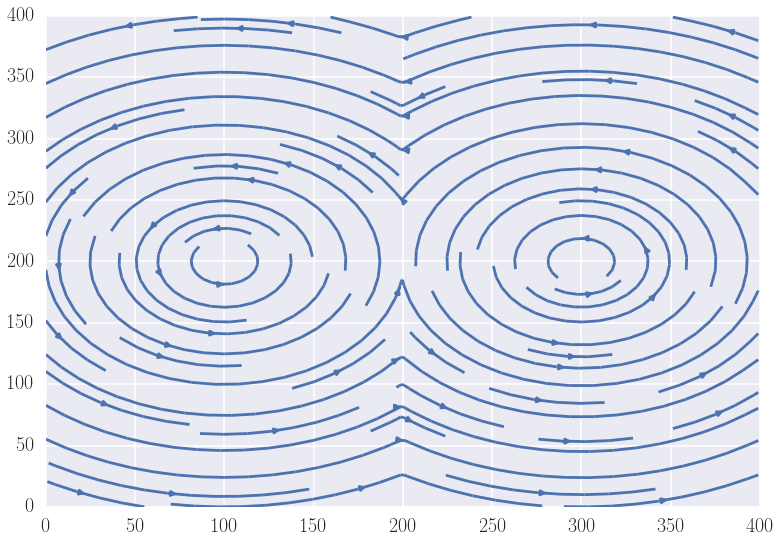

In [13]:
plt.streamplot(xmesh, ymesh, v, u)
plt.savefig('2d_example_flow.png', dpi=200, bbox_inches='tight')

Cool. Let's try this. The fluid should rotate every 10 iterations. We don't want the maximum speed to be greater than $dr/dt$...let's check that they are close at least.

In [14]:
#fi_orig = np.zeros((imax, jmax), dtype=np.double)
#fi_orig[47:53, 47:53] = 0.1
fi_orig = None

D = (.05*dr**2/dt)
s = 0.7

In [15]:
dr/dt

0.25

In [16]:
v.max()

0.02

In [17]:
u.max()

0.0099000000000000008

In [18]:
D

3.125e-05

We set the growth rate large and the diffusion constant small.

In [19]:
sol = Solver(imax=imax, jmax=jmax, kmax=kmax, dt=dt, use_morton=False, s=s,
            v=v, u=u, dr=dr, D=D, fi_orig = fi_orig)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


In [20]:
result = sol.run(record_images=False)

Done with iteration 0
Minimum (to check for stability): 0.0
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...
Done!
About to solve...


KeyboardInterrupt: 

In [21]:
left_side = sol.I - (sol.dt/2.)*sol.zeta + (sol.dt/2.)*sol.A

In [24]:
import scipy as sp

In [25]:
ruh_roh = sp.sparse.linalg.inv(left_side)

KeyboardInterrupt: 

My algorithm is *very* unstable sadly. Not sure what is up with it. Time's up, however, and perhaps the class can help me debug.